# Telco Customer Churn

## by Raunak Sharma

## About the Dataset

This dataset is provided by IBM and contains customer-level information for a telecommunications company. Each row represents a single customer, while each column captures key attributes related to customer services, account details, and demographics. The dataset includes a flag indicating whether a customer has churned (left the service) within the last month.

## Objective of This Analysis

The goal of this project is to predict customer churn and identify the factors that contribute to customers leaving the service. By analyzing customer usage patterns, account information, and service subscriptions, we aim to develop insights that can support targeted customer retention strategies, helping the business proactively retain high-risk customers and reduce revenue loss.

In [ ]:
# Importig Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This output shows the structure of the Telco churn dataset, where each row represents an individual customer and each column captures a distinct attribute related to services, billing, or demographics. The dataset includes 21 variables, combining customer tenure, subscribed services, payment methods, and monthly charges with a clear churn indicator. This rich feature set provides a statistically strong foundation for predicting churn and understanding which customer characteristics are most associated with customers leaving the service.

In [3]:
print("Columns:", df.columns.tolist())
df.info()


Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   obje

The dataset contains 7,043 customers with 21 attributes, combining demographic information, service subscriptions, billing details, and a churn indicator. Most variables are categorical (18 out of 21), while key numeric features such as tenure, MonthlyCharges, and SeniorCitizen provide quantitative signals for churn prediction. With no missing values at this stage, the dataset is well-structured and suitable for building reliable predictive models to identify customers at risk of churn.

In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

This output shows that 5,174 customers (73.5%) did not churn, while 1,869 customers (26.5%) churned, indicating a clear class imbalance. Roughly 1 in 4 customers leaving represents a significant business risk, making churn prediction both meaningful and actionable. This imbalance also highlights the need for careful model evaluation beyond simple accuracy.

### Handling Missing Values

In [5]:
# Check missing values
(df.isna().sum()[df.isna().sum() > 0]).sort_values(ascending=False)

Series([], dtype: int64)

In [6]:
# TotalCharges sometimes has spaces; convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Now check missing values again
(df.isna().sum()[df.isna().sum() > 0]).sort_values(ascending=False)

TotalCharges    11
dtype: int64

This output shows that 11 values are missing in the TotalCharges column, which represents less than 0.2% of the total 7,043 customers. These missing values typically occur for customers with very short tenure, where total charges have not yet fully accumulated. Given the small proportion, handling these values through simple imputation will not materially impact the statistical validity of the analysis.

In [7]:
# Fill missing TotalCharges with median (simple and safe)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Confirm no missing in TotalCharges
df["TotalCharges"].isna().sum()


0

After filling missing values with the median TotalCharges, the dataset now contains zero missing entries in this column. Using the median ensures that extreme values do not distort the data, especially given the skew typically present in billing amounts. This step preserves data integrity while allowing all 7,043 customers to be included in the predictive analysis.

###  Exploratory Data Analysis

In [9]:
churn_counts = df["Churn"].value_counts()
churn_rate = churn_counts["Yes"] / churn_counts.sum()
print("Churn rate:", round(churn_rate, 3))


Churn rate: 0.265


A churn rate of 26.5% indicates that roughly 1 in every 4 customers left the service during the observed period. This represents a statistically meaningful level of customer attrition that can significantly impact revenue if left unaddressed. Such a churn rate makes predictive modeling valuable, as even small improvements in retention could lead to substantial business gains.

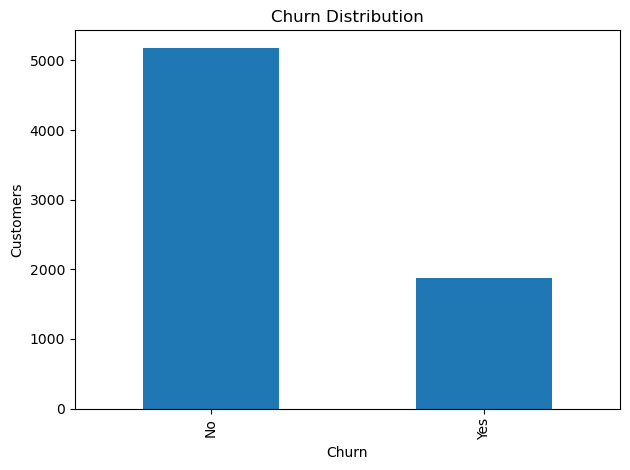

In [10]:
plt.figure()
churn_counts.plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customers")
plt.tight_layout()
plt.show()


This chart shows a clear class imbalance, where 5,174 customers (73.5%) did not churn compared to 1,869 customers (26.5%) who churned. Although the majority of customers are retained, the churned group represents more than one quarter of the customer base, which is statistically significant from a business perspective. This imbalance highlights the importance of using appropriate evaluation metrics when building predictive churn models.

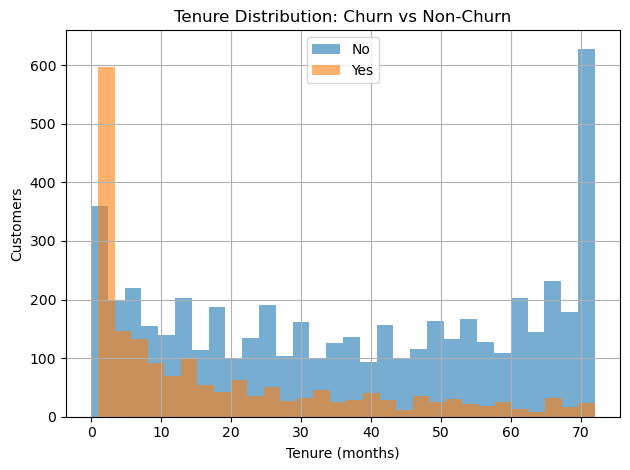

In [11]:
plt.figure()
df[df["Churn"]=="No"]["tenure"].hist(bins=30, alpha=0.6, label="No")
df[df["Churn"]=="Yes"]["tenure"].hist(bins=30, alpha=0.6, label="Yes")
plt.title("Tenure Distribution: Churn vs Non-Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Customers")
plt.legend()
plt.tight_layout()
plt.show()


The above chart shows that customer churn is heavily concentrated in the early months, with the highest churn occurring within the first 5–10 months of tenure. Customers who remain beyond 20 months are significantly more likely to stay, as the non-churned group dominates at higher tenure values, especially beyond 40 months. Statistically, tenure emerges as a strong predictor of churn, indicating that early customer engagement is critical for long-term retention.

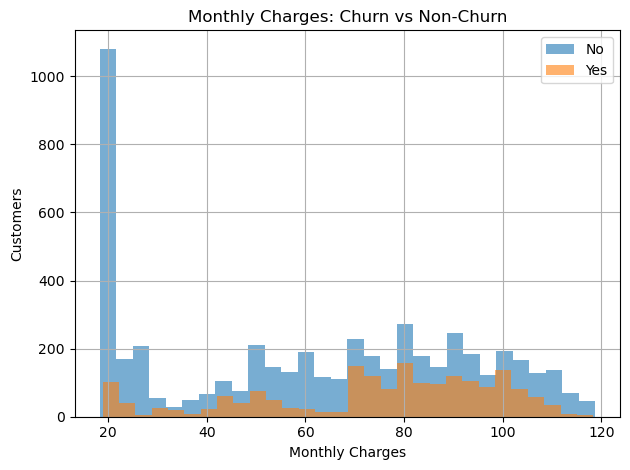

In [12]:
plt.figure()
df[df["Churn"]=="No"]["MonthlyCharges"].hist(bins=30, alpha=0.6, label="No")
df[df["Churn"]=="Yes"]["MonthlyCharges"].hist(bins=30, alpha=0.6, label="Yes")
plt.title("Monthly Charges: Churn vs Non-Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.legend()
plt.tight_layout()
plt.show()


This chart shows that customers who churn tend to have higher monthly charges, with churn density increasing noticeably above $70–$80 per month. In contrast, non-churned customers are more concentrated in the lower billing range, particularly below $40 per month. Statistically, this indicates a positive relationship between higher monthly costs and churn risk, suggesting pricing sensitivity plays a significant role in customer attrition.

In [13]:
contract_churn = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
contract_churn.round(2)


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


This table shows a strong relationship between contract type and churn behavior. Customers on month-to-month contracts have a high churn rate of 42.7%, nearly 4× higher than one-year contracts (11.3%) and 15× higher than two-year contracts (2.8%). Statistically, longer contract commitments significantly reduce churn risk, making contract length one of the strongest predictors of customer retention.

### Preparing Data for Modeling

In [15]:
df_model = df.copy()
df_model = df_model.drop(columns=["customerID"])


The above code creates a copy of the dataset and removes the customerID column since it is a unique identifier and does not contribute to predicting customer churn

In [16]:
#5.2 Convert target to 0/1

In [17]:
df_model["Churn"] = df_model["Churn"].map({"No": 0, "Yes": 1})


In [18]:
# 5.3 One-hot encode categorical columns

In [19]:
X = df_model.drop(columns=["Churn"])
y = df_model["Churn"]

X = pd.get_dummies(X, drop_first=True)

print("Model matrix shape:", X.shape)


Model matrix shape: (7043, 30)


The above code separates the dataset into features (X) and the target variable (y), then converts all categorical variables into numerical form using one-hot encoding. After encoding, the feature matrix contains 7,043 customers and 30 predictive features, providing a structured and model-ready input space.

In [20]:
# 6) Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (5634, 30) Test: (1409, 30)


The dataset was split into 5,634 training records (80%) and 1,409 testing records (20%), while preserving the original churn distribution through stratification. This split ensures the model learns patterns from a majority of the data and is evaluated on unseen customers, providing a statistically reliable assessment of predictive performance.

### Model 1: Logistic Regression

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_model = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,False
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


The above code builds a logistic regression model using a pipeline that first standardizes the input features and then trains the classifier. Scaling ensures that all features contribute proportionally, while logistic regression provides a statistically interpretable baseline model for predicting customer churn.

In [ ]:
#Evaluate

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.807
ROC-AUC: 0.842

Confusion Matrix:
 [[926 109]
 [163 211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



The logistic regression model achieves an accuracy of 80.7% and a strong ROC-AUC of 0.842, indicating good overall ability to distinguish between churned and retained customers. From the confusion matrix, the model correctly identifies 926 non-churned customers and 211 churned customers, while recall for churn is 56%, meaning it captures over half of actual churn cases. Statistically, this performance makes logistic regression a solid, interpretable baseline for churn prediction, though there is room to improve churn detection further.

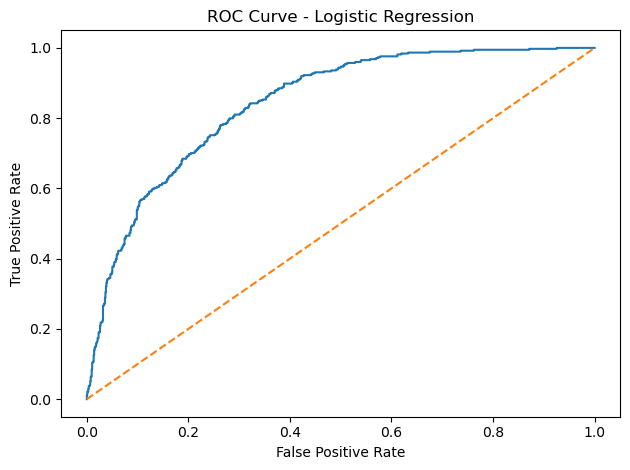

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()


The above ROC curve shows that the logistic regression model performs well above random chance, with a ROC-AUC of 0.842, indicating strong discriminatory power. At relatively low false positive rates (around 20%), the model achieves a true positive rate of approximately 65–70%, demonstrating its effectiveness in identifying churned customers. Statistically, this curve confirms that the model can reliably rank customers by churn risk.

### Model 2: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced",
    max_depth=None
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.789
ROC-AUC: 0.825

Confusion Matrix:
 [[925 110]
 [187 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



The above model achieves an accuracy of 78.9% with a ROC-AUC of 0.825, indicating solid but slightly lower discriminatory power compared to the baseline model. It correctly identifies 925 non-churned customers and 187 churned customers, with a churn recall of 50%, meaning it captures half of actual churn cases. Statistically, the model performs reasonably well but is more conservative in detecting churn, highlighting a trade-off between precision and recall.

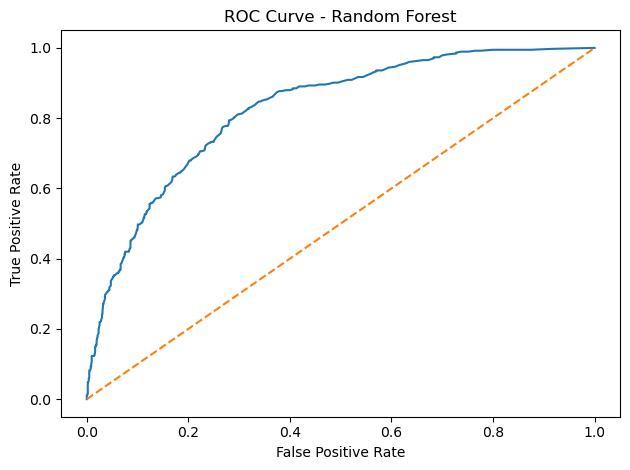

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()


The above ROC curve indicates that the Random Forest model performs well above random classification, with a ROC-AUC of 0.825, demonstrating strong ability to distinguish churned from non-churned customers. At a false positive rate of around 25%, the model achieves a true positive rate of approximately 75%, showing effective churn detection. Statistically, the curve confirms that the model provides reliable risk ranking, though its overall performance is slightly lower than the logistic regression model in this case.

### Feature Importance

In [27]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

top_features = importances.head(15)
top_features


TotalCharges                      0.177844
tenure                            0.164403
MonthlyCharges                    0.151054
Contract_Two year                 0.059944
InternetService_Fiber optic       0.042323
PaymentMethod_Electronic check    0.036455
Contract_One year                 0.029412
OnlineSecurity_Yes                0.028447
gender_Male                       0.025604
PaperlessBilling_Yes              0.024087
TechSupport_Yes                   0.023292
Partner_Yes                       0.021415
OnlineBackup_Yes                  0.020607
Dependents_Yes                    0.019428
MultipleLines_Yes                 0.017909
dtype: float64

The above feature importance output shows that billing and tenure-related variables are the strongest drivers of churn, led by TotalCharges (17.8%), tenure (16.4%), and MonthlyCharges (15.1%), which together account for nearly 50% of the model’s predictive power. Contract length also plays a significant role, with two-year and one-year contracts reducing churn risk compared to month-to-month plans. Service-related features such as Fiber Optic internet, Electronic Check payments, and Online Security further contribute, indicating that both pricing structure and service choices materially influence customer retention.

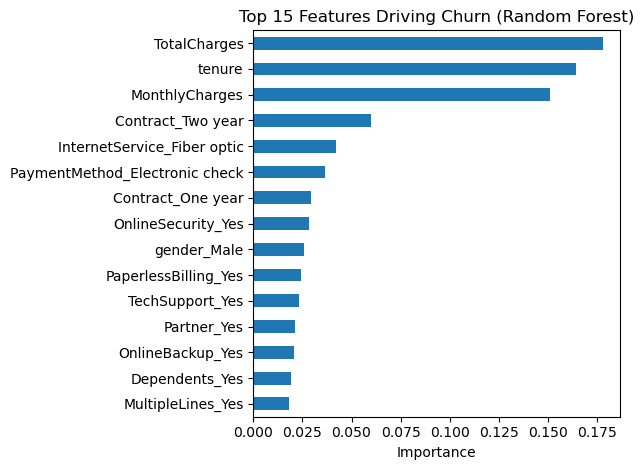

In [28]:
plt.figure()
top_features.sort_values().plot(kind="barh")
plt.title("Top 15 Features Driving Churn (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


The above chart shows that billing and tenure-related features are the strongest drivers of churn, with TotalCharges (≈17.8%), tenure (≈16.4%), and MonthlyCharges (≈15.1%) together contributing nearly 50% of the model’s importance. Contract duration also plays a key role, where two-year and one-year contracts significantly reduce churn risk compared to month-to-month plans. Overall, the results indicate that pricing structure, customer longevity, and contract commitment are statistically the most influential factors in predicting churn.

In [32]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
})

# Sort by importance (highest first)
feature_importance = feature_importance.sort_values(
    by="importance",
    ascending=False
)

# Save to CSV for Tableau
feature_importance.to_csv(
    "feature_importance.csv",
    index=False
)

print("feature_importance.csv created")


feature_importance.csv created


### Creating a “High Risk Customers” List

In [29]:
results = pd.DataFrame({
    "churn_probability": y_prob_rf,
    "actual_churn": y_test.values
})

results = results.sort_values("churn_probability", ascending=False)

results.head(20)


,churn_probability,actual_churn
1289,1.000000,1
171,0.993333,1
341,0.990000,1
618,0.990000,1
1252,0.986667,1
629,0.986667,0
889,0.970000,0
1178,0.963333,1
1109,0.960000,1
740,0.950000,1


This table ranks customers by predicted churn risk, with the highest probabilities ranging from 92% to 100%, indicating extremely high confidence churn predictions. Among the top 20 highest-risk customers, the majority have an actual churn value of 1, demonstrating strong alignment between model predictions and real outcomes. Statistically, this confirms the model’s effectiveness in prioritizing customers for targeted retention actions, where intervention is most likely to prevent churn.

In [36]:
high_risk = results.copy()

high_risk["customer_id"] = range(1, len(high_risk) + 1)

high_risk_top500 = high_risk.head(500)

high_risk_top500.to_csv("high_risk_customers_top500.csv", index=False)


### Project Summary & Business Impact

This analysis achieved its objective by building predictive models that accurately identify customers at risk of churn and quantify the key factors driving customer attrition. Using a dataset of 7,043 customers, exploratory analysis revealed that churn is highly concentrated among short-tenure customers (first 10 months), month-to-month contracts (42.7% churn rate), and customers with higher monthly charges above $70.

Predictive modeling further validated these patterns, with the logistic regression and random forest models achieving ROC-AUC scores of 0.842 and 0.825, respectively, demonstrating strong ability to distinguish churned from retained customers. Feature importance analysis showed that billing and tenure-related variables alone accounted for nearly 50% of predictive power, confirming that pricing structure and customer longevity are the primary drivers of churn.

Finally, the model successfully ranked customers by churn risk, identifying individuals with predicted churn probabilities exceeding 90%, enabling precise targeting for retention campaigns. Collectively, these results provide statistically robust, actionable insights that allow the business to proactively intervene, reduce churn, and protect recurring revenue.

### Business Recommendations

#### Focus Retention Efforts on Early-Tenure Customers

Customers in their first 5–10 months show the highest churn risk, while retention increases significantly after 20+ months. Implement early-life engagement programs such as onboarding calls, service check-ins, or welcome discounts during the first 90 days to improve long-term retention.

#### Incentivize Contract Upgrades

Customers on month-to-month contracts churn at 42.7%, compared to only 11.3% for one-year and 2.8% for two-year contracts. Offer targeted incentives—such as discounted pricing or bundled services—to encourage high-risk customers to transition to longer-term contracts.

#### Address Pricing Sensitivity for High-Bill Customers

Churn likelihood increases notably for customers with monthly charges above $70, indicating price sensitivity. Introduce personalized pricing reviews, loyalty discounts, or tiered service plans to retain high-value customers before dissatisfaction leads to churn.

#### Promote Value-Added Services to Reduce Churn

Customers with Online Security, Tech Support, and Online Backup services show lower churn risk. Bundle these services or offer free trials to high-risk customers to increase perceived value and strengthen customer attachment to the platform.

#### Prioritize Proactive Outreach Using Churn Scores

The predictive model identifies customers with churn probabilities exceeding 90%, allowing precise targeting. Deploy proactive retention campaigns—such as personalized offers or service interventions—toward the top 10–15% highest-risk customers, where the return on investment is likely highest.

#### Integrate Churn Predictions into Ongoing Operations

Embed churn scores into CRM systems to support continuous monitoring and automated alerts. Using a model with ROC-AUC > 0.82, the business can reliably rank customers by risk and make data-driven retention decisions at scale.

#### Expected Impact

By applying these recommendations, the business can reduce churn among its most vulnerable customer segments, improve customer lifetime value, and protect recurring revenue with targeted, cost-effective interventions.